In [ ]:
Use decison trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not
Marital.Status : marital status of a person
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
Work Experience : Work experience of an individual person
Urban : Whether that person belongs to urban area or not

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
#reading the data
df = pd.read_csv('Fraud_check.csv')
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
df1=df.copy()

In [4]:
df1.shape

(600, 6)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
df1.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [7]:
df1.isnull().sum() # no Null value

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [8]:
df1.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


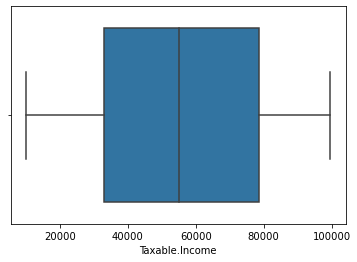

In [8]:
#outlier check
#There is not outlier in Taxable.Income 
import seaborn as sns
ax = sns.boxplot(df1['Taxable.Income'])

In [9]:
#Corerlation
corr = df1.corr()

In [10]:
corr

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


In [11]:
#Convert categorical columns Undergrad, Marital.Status,Urban into categorical numerical
df1 = pd.get_dummies(df1, columns = ['Undergrad','Marital.Status','Urban'])

In [13]:
df1

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1
596,69967,55369,2,0,1,1,0,0,0,1
597,47334,154058,0,1,0,1,0,0,0,1
598,98592,180083,17,0,1,0,1,0,1,0


In [14]:
df1.shape

(600, 10)

In [15]:
corr=df1.corr()

In [16]:
corr

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
Taxable.Income,1.000000,-0.064387,-0.001818,0.049232,-0.049232,0.062099,-0.100611,0.037910,-0.070628,0.070628
City.Population,-0.064387,1.000000,0.013135,-0.079579,0.079579,0.004925,-0.007035,0.002087,0.040098,-0.040098
Work.Experience,-0.001818,0.013135,1.000000,0.005362,-0.005362,-0.014833,0.033347,-0.018123,0.094559,-0.094559
Undergrad_NO,0.049232,-0.079579,0.005362,1.000000,-1.000000,0.045101,-0.015120,-0.028883,-0.000267,0.000267
Undergrad_YES,-0.049232,0.079579,-0.005362,-1.000000,1.000000,-0.045101,0.015120,0.028883,0.000267,-0.000267
Marital.Status_Divorced,0.062099,0.004925,-0.014833,0.045101,-0.045101,1.000000,-0.468757,-0.510435,0.065518,-0.065518
Marital.Status_Married,-0.100611,-0.007035,0.033347,-0.015120,0.015120,-0.468757,1.000000,-0.520317,-0.016771,0.016771
Marital.Status_Single,0.037910,0.002087,-0.018123,-0.028883,0.028883,-0.510435,-0.520317,1.000000,-0.047014,0.047014
Urban_NO,-0.070628,0.040098,0.094559,-0.000267,0.000267,0.065518,-0.016771,-0.047014,1.000000,-1.000000
Urban_YES,0.070628,-0.040098,-0.094559,0.000267,-0.000267,-0.065518,0.016771,0.047014,-1.000000,1.000000


<AxesSubplot:>

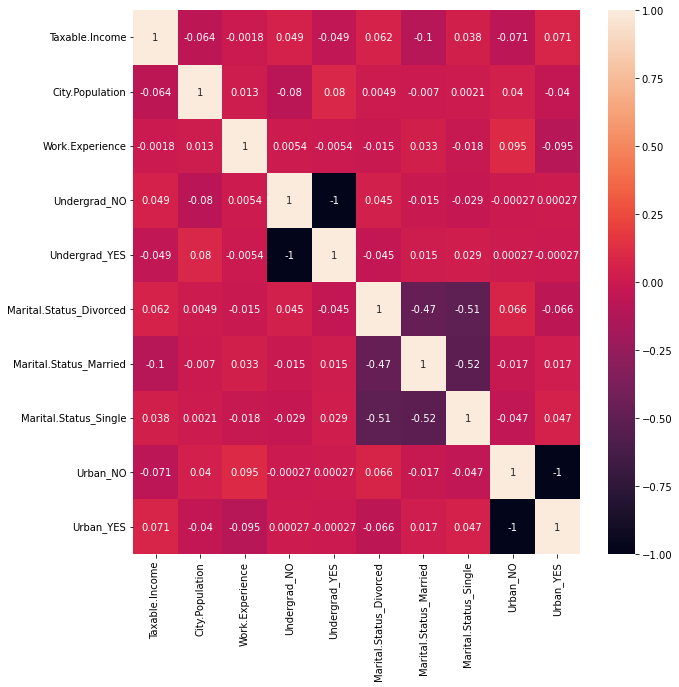

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

In [ ]:
# Decision tree can be built with target variable Taxable.Income which is contineous, we will first convert it in categorical variable. 
# taxable_income <= 30000 as "Risky" and others are "Good"

In [18]:
df1['Taxable.Income']=pd.cut(df1['Taxable.Income'],bins=[0,30000,100000],labels=['risky','good'])

In [19]:
df1

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,good,50047,10,1,0,0,0,1,0,1
1,good,134075,18,0,1,1,0,0,0,1
2,good,160205,30,1,0,0,1,0,0,1
3,good,193264,15,0,1,0,0,1,0,1
4,good,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,good,39492,7,0,1,1,0,0,0,1
596,good,55369,2,0,1,1,0,0,0,1
597,good,154058,0,1,0,1,0,0,0,1
598,good,180083,17,0,1,0,1,0,1,0


In [21]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'HeartDisease'.
df1['Taxable.Income']= label_encoder.fit_transform(df1['Taxable.Income'])
  

In [22]:
df1['Taxable.Income'].unique()

array([0, 1])

In [25]:
df1

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,0,50047,10,1,0,0,0,1,0,1
1,0,134075,18,0,1,1,0,0,0,1
2,0,160205,30,1,0,0,1,0,0,1
3,0,193264,15,0,1,0,0,1,0,1
4,0,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,0,39492,7,0,1,1,0,0,0,1
596,0,55369,2,0,1,1,0,0,0,1
597,0,154058,0,1,0,1,0,0,0,1
598,0,180083,17,0,1,0,1,0,1,0


In [26]:
list(df1.columns)

['Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Undergrad_NO',
 'Undergrad_YES',
 'Marital.Status_Divorced',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_NO',
 'Urban_YES']

In [27]:
X = df1.iloc[:,1:10]
y = df1.iloc[:,0]

In [28]:
X

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0,1
596,55369,2,0,1,1,0,0,0,1
597,154058,0,1,0,1,0,0,0,1
598,180083,17,0,1,0,1,0,1,0


In [29]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Taxable.Income, Length: 600, dtype: int32

In [32]:
y.value_counts()

0    476
1    124
Name: Taxable.Income, dtype: int64

In [41]:
# Splitting data into training and testing data set
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=40)

In [42]:
y_train.value_counts()

0    360
1     90
Name: Taxable.Income, dtype: int64

# Building Decision Tree Classifier using Entropy Criteria
#C5.0

In [43]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

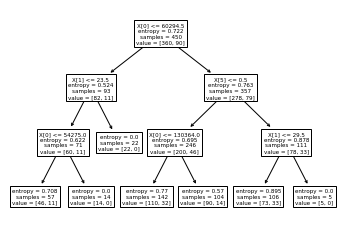

In [44]:
#PLot the decision tree
tree.plot_tree(model);

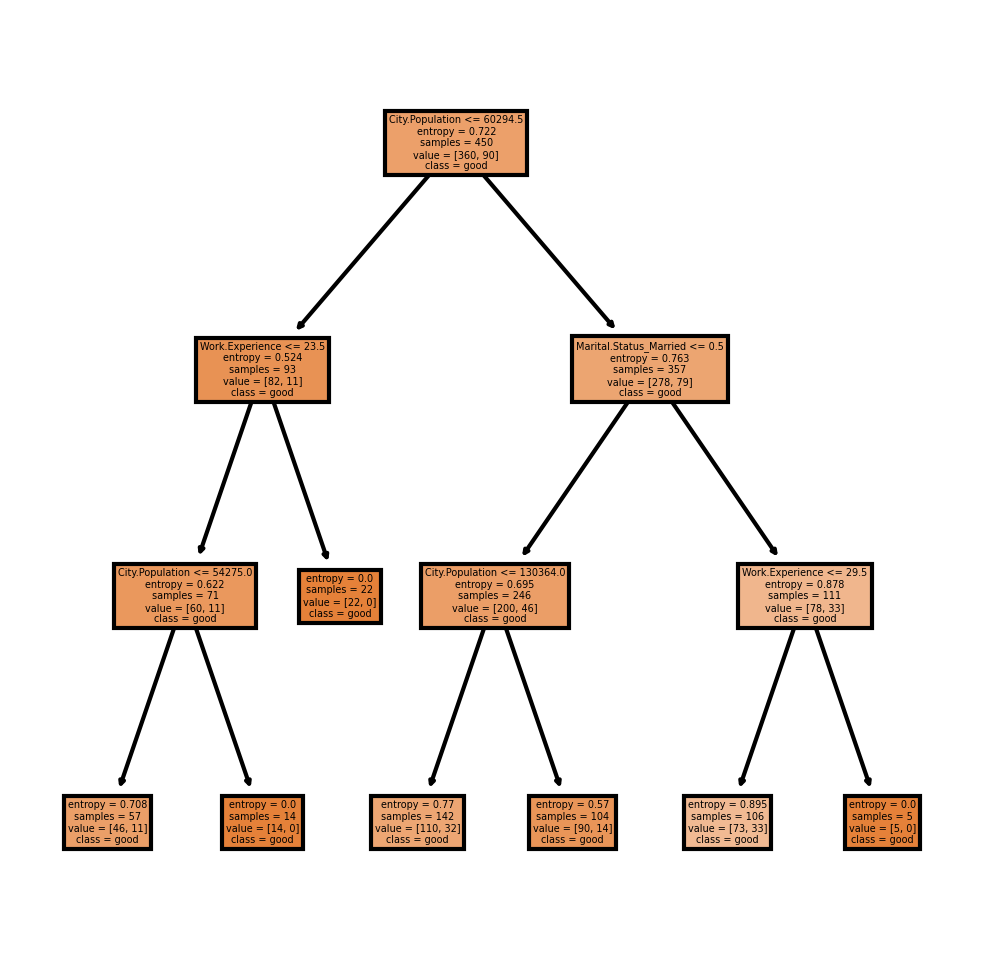

In [45]:
fn=['City.Population','Work.Experience','Undergrad_NO','Undergrad_YES','Marital.Status_Divorced','Marital.Status_Married','Marital.Status_Single','Urban_NO','Urban_YES']
cn=['good', 'risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [46]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

0    150
dtype: int64

In [47]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [48]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions on test data

col_0,0
Taxable.Income,
0,116
1,34


In [49]:
# Accuracy for test data
#75% is the accuracy on test data
np.mean(preds==y_test)

0.7733333333333333

In [50]:
y_test

159    0
307    0
253    0
528    0
137    1
      ..
350    0
168    1
372    0
576    0
366    0
Name: Taxable.Income, Length: 150, dtype: int32

In [51]:
df_t=pd.DataFrame({'Actual':y_test, 'Predicted':preds})


In [52]:
df_t

,Actual,Predicted
159,0,0
307,0,0
253,0,0
528,0,0
137,1,0
...,...,...
350,0,0
168,1,0
372,0,0
576,0,0


In [ ]:
#Conclusion for test data
#Since the accuracy on the test data which is 77%

In [53]:
# For Training dataset
pred_train = model.predict(x_train)

In [54]:
pd.Series(pred_train).value_counts() # getting the count of each category 

0    450
dtype: int64

In [55]:
pred_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [56]:
pd.crosstab(y_train,pred_train) # getting the 2 way table to understand the correct and wrong predictions on train data

col_0,0
Taxable.Income,
0,360
1,90


In [57]:
# Accuracy for test data
np.mean(pred_train==y_train)

0.8

In [ ]:
#Conclusion for train data
#Since the accuracy on the test data which is 80%

# Building Decision Tree Classifier (CART) using Gini Criteria

In [58]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [59]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [60]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.7733333333333333

In [ ]:
#Conclusion for test data with Gini
#Since the accuracy on the test data which is 77%